# Milestone 1: Data Cleaning and Pre-Processing


## Home Loan Approval Dataset

#### By: Soheil Dejnabadi (PSID: 1937584)

##### Data Description


Currently, the United States (U.S.) is experiencing a housing crisis caused by a growing national population accompanied by
limited housing. As a result, the house market prices have increased due to the increasing demand for housing. With the
ongoing crisis, our team decided it would be relevant to investigate what variables go into play when companies deny or
approve home loans for homebuyers to help the consumer understand qualities they might need to be approved for a home
loan and automate a finance company's loan approval process which may, as a result, ease the housing crisis.



The dataset that we have chosen is data from the home loan company, Dream Housing Finance company. They are prevalent
in all urban, semi-urban (i.e.: suburban), and rural areas. The company is looking for a way to automate their home loan
eligibility process based on the consumer's traits and has gathered their consumer's data into a dataset to better automate
this process. According to our dataset's website, Kaggle: Home Loan Approval Dataset, our original dataset has 13 features
and over 600 observations. Some consumer traits the company looks into when applicants apply for a home loan include:
Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History, Loan Amount Term, etc.

Through the data cleaning process, our goal is to eliminate irrelevant data, fix structural errors, remove/handle data with null
values, and filter out outliers with the intention that the final, cleaned data set will help us understand what loan companies
are looking for in their candidate loaners. To start, we will import libraries to assist with data cleaning, import our data, and
view the features' data types.


First, let's import our important libraries:


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 15, 5
sns.set_style('darkgrid')

Now, we will load in our data into a pandas dataframe so that it is easier for us to manipulate during the data cleaning
process. Then, we take a peek to see if our data has loaded in properly.


In [3]:
loan_data = pd.read_csv('loan_sanction_train.csv')
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Finally, to generally understand the features we are working with, we will take a look at the types of each feature. From our
output, we see that we have object types (8), integer types (1), and float types (4).


In [4]:
loan_data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

Now that we have our dataset imported properly and understand our features and dataset dimensions more, we keep this
information in mind as we begin to explore and manipulate our dataset in the data cleaning process to help the finance
company automate their home loaning process.


##### Exploratory Data Analysis

To get more information on our features, we will do some exploratory data analysis (EDA). By the end of this analysis, we hope
to discover the dataset's natural patterns, find outliers, and make sense of the dataset through statistical summaries and
graphical representations.


First, we want to better understand the makeup of our dataset. Using .info() below, the function outputs a table that notes the
number of observations we have, the number of columns and their names, as well as the dtypes per column.


In [5]:
loan_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


Looking at the Non-Null Count column, we see that for the majority of our 12 columns/features, we have that most features
contain most, if not all, of their 614 observations. When data cleaning, we would likely want to more closely take a look at the
"Credit_History", "Self_Employed", and "LoanAmount" features, since they have the least non-null values, meaning more
empty values out of their 614 observations.

Now, we will try to better understand the data through descriptive statistics, which can only be done for our float and integer
type variables. We can see the 5-number summary for each of these values, as well as their mean and standard deviation.

In [6]:
loan_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


###### Visualization: 
Now, we want to be able to visualize the natural patterns that occur within the dataset relating to LoanAmount
and Loan_Amount_Term. This way, we can see the changes of the loan amounts as it relates to time.

Text(0.5, 0.98, 'Loan Approval by Loan Term and Loan Amount')

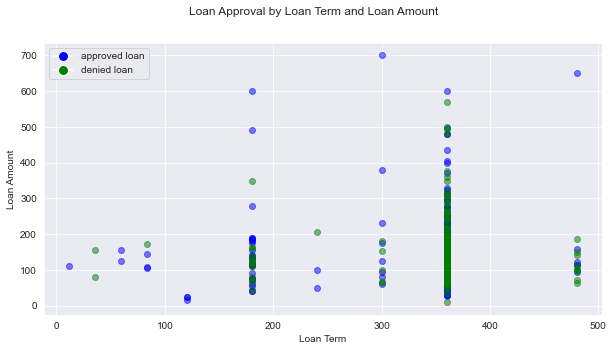

In [8]:
from matplotlib.lines import Line2D
fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(loan_data[loan_data["Loan_Status"]=="Y"]["Loan_Amount_Term"],
           loan_data[loan_data["Loan_Status"]=="Y"]["LoanAmount"], c = "blue", alpha = 0.5)
ax.scatter(loan_data[loan_data["Loan_Status"]=="N"]["Loan_Amount_Term"],
           loan_data[loan_data["Loan_Status"]=="N"]["LoanAmount"], c = "green", alpha = 0.5)

ax.set_xlabel("Loan Term")
ax.set_ylabel("Loan Amount")

color_patches = [
    Line2D([0],[0], marker='o', color='w', label="approved loan", markerfacecolor='b', markersize=10),
    Line2D([0],[0], marker='o', color='w', label='denied loan', markerfacecolor = 'g', markersize =10)]
ax.legend(handles=color_patches)

fig.suptitle("Loan Approval by Loan Term and Loan Amount")


###### Duplicated Observations: 
We should ensure that if there are any naturally duplicated observations in our dataset, that we
remove them in data cleaning as they are unnecessary. Since our sum is 0, we know that there are no duplicated values.

In [9]:
# Finding duplicate values: 
loan_data.duplicated().sum()

0

###### Correlation: 
From the correlation matrix, we see that there is a strong correlation between the applicant's loan amount and
income, and similarly the co-applicant's income and the loan amount. This leads us to think that this is one of the more
important features the company will look at. Also, we see some correlation between the loan amount and the loaning term.


<ipython-input-10-b6ea2c484a5f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(loan_data.corr(), cmap = "BuPu")


Text(0.5, 1.0, 'Correlation of Quantitative Values')

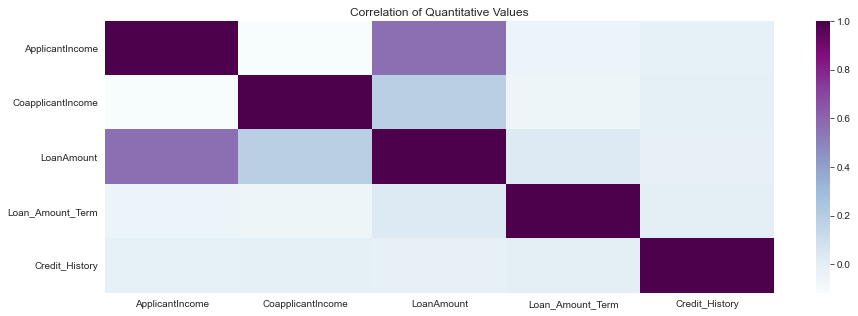

In [10]:
ax = plt.axes()
sns.heatmap(loan_data.corr(), cmap = "BuPu")
ax.set_title('Correlation of Quantitative Values')

We also made a correlation matrix for the qualitative and quantitative variables together. Here we can see the impact that
each qualitative variable has on our quantitative variables.From the matrix, we see that the qualitative variables with the most
impact on the loan amount are the number of dependents, the applicant's income, and co-applicant's income. Additionally,
we note that Credit_History has no correlation to any of the other variables.

<ipython-input-11-023d44ce5a09>:14: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(loan_data_matrix.corr(), cmap = sns.color_palette("muted"))


Text(0.5, 1.0, 'Correlation of Quantitative/Qualitative Values')

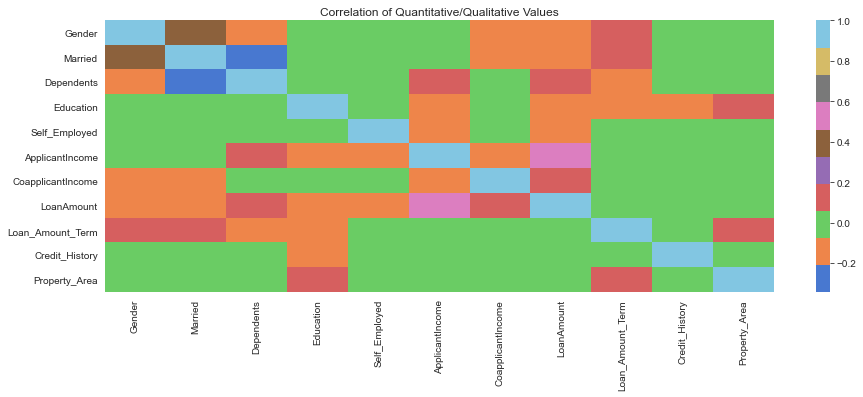

In [11]:
loan_data_matrix = pd.read_csv('loan_sanction_train.csv')

# Since we have some qualitative variables, we need to assign them to integers so we can measure their correlati
# compared to our quantitative variables.

loan_data_matrix['Gender'].replace(['Male', 'Female'], [0, 1], inplace = True)
loan_data_matrix['Married'].replace(['Yes', 'No'], [0, 1], inplace = True)
loan_data_matrix['Dependents'].replace(['0', '1', '2', '3+'], [0, 1, 2, 3], inplace = True)
loan_data_matrix['Education'].replace(['Graduate', 'Not Graduate'], [0, 1], inplace = True)
loan_data_matrix['Self_Employed'].replace(['Yes', 'No'], [0, 1], inplace = True)
loan_data_matrix['Property_Area'].replace(['Urban', 'Semiurban', 'Rural'], [0, 1, 2], inplace = True)

ax = plt.axes()
sns.heatmap(loan_data_matrix.corr(), cmap = sns.color_palette("muted"))

ax.set_title('Correlation of Quantitative/Qualitative Values')


###### Checking for Outliers: 
We want to see if there are any unusual observations that we should be aware of and that could
potentially skew our future data processing with the quantitative variables. With the boxplots, we see that there are many
outliers in the variables ApplicantIncome, CoapplicantIncome, and LoanAmount. On the other hand, we do not see many
outliers with the Loan_Amount_Term and Credit_History variables. This makes sense because the loan terms are labels that
note distinct points in time that loans are typically given, and credit history is a binary variable. Thus, we will pay more
attention to the other three variables as we prepare to clean the dataset, so that we can remove outliers in data pre-processing.

ApplicantIncome         AxesSubplot(0.125,0.125;0.133621x0.755)
CoapplicantIncome    AxesSubplot(0.285345,0.125;0.133621x0.755)
LoanAmount            AxesSubplot(0.44569,0.125;0.133621x0.755)
Loan_Amount_Term     AxesSubplot(0.606034,0.125;0.133621x0.755)
Credit_History       AxesSubplot(0.766379,0.125;0.133621x0.755)
dtype: object

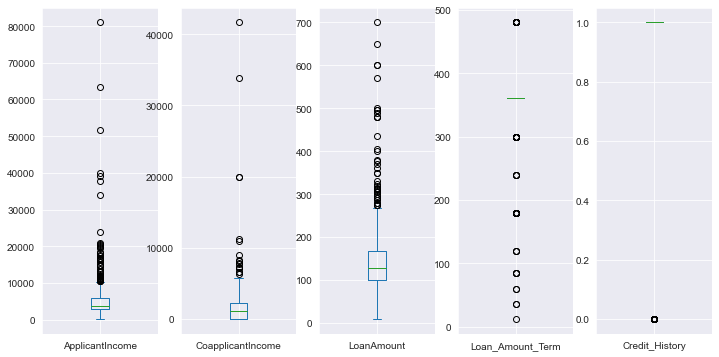

In [12]:
loan_data.plot(kind = "box", subplots=True, sharey = False, figsize=(12,6))

###### Looking for Null values: 
Going through each feature and recalling the "Non-Null Count", we can look more closely at the
percentage of null values in each feature. As we see below, the null values are minimal. The highest percentage of null values
is 8% in the Credit_History feature which is not very significant so may be able to remove the null values.

In [13]:
pct_missing = loan_data.isna().mean()
pct_missing[:12]


Loan_ID              0.000000
Gender               0.021173
Married              0.004886
Dependents           0.024430
Education            0.000000
Self_Employed        0.052117
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           0.035831
Loan_Amount_Term     0.022801
Credit_History       0.081433
Property_Area        0.000000
dtype: float64

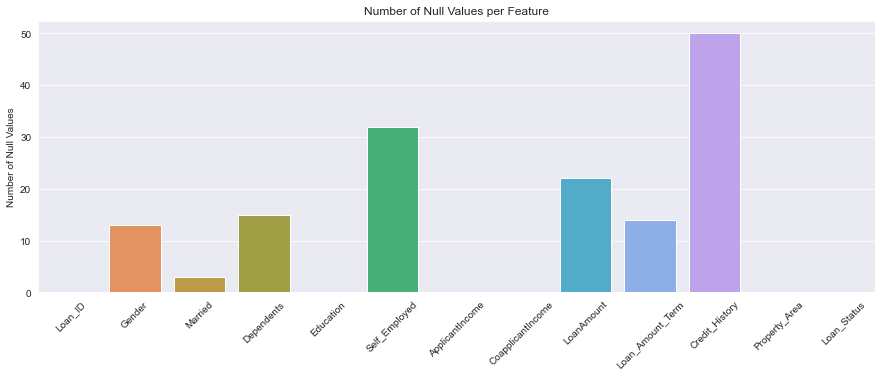

In [14]:
#Visualizing our Null Values per Feature
fig = sns.barplot(x=loan_data.columns, y=loan_data.isnull().sum().values)
plt.xticks(rotation=45)
fig.set(ylabel = "Number of Null Values", title="Number of Null Values per Feature")
plt.show()


##### Data Cleaning/Feature Engineering

Now that we have a good grasp on our data set, it is time to go through the data cleaning process to make future data
manipulation more convenient to handle.


###### Step 1: Removing irrelevant and duplicate data - 
From our EDA process, we noted that there were no duplicated
observations. Additionally, looking at the quanlitative/quantitative correlation matrix, only the Credit_History feature was not
correlated to any of the other variables in the matrix, so we will remove it. Now, we have 12 features remaining.


In [15]:
loan_data = loan_data.drop(['Credit_History'], axis=1)

###### Step 2: Fixing structural errors - 
There are some inconsistent naming conventions and data types that may make future data
manipulation more bothersome. Thus, we will fix that now by renaming some of our variables to be consistently in 'snake
case' (ex: variable_name). Additionally, we will fix the Applicant_Income variable to match the other numerical features in data
type, so we will reassign it to be float type.

In [25]:
loan_data = loan_data.rename(columns={'ApplicantIncome': 'Applicant_Income',
                                      'CoapplicantIncome':'Coapplicant_Income', 'LoanAmount': 'Loan_Amount'})

loan_data.Applicant_Income = loan_data.Applicant_Income.astype(float)


###### Step 3: Removing/handling missing data - 
Since we had a small percentage of null values and a lot of observations, we are
going to drop the observations that contain a null value. This is the simplest solution because we have enough observations,
and deleting the whole row containing a null value will result in an even amount of observations under each feature.


In [26]:
# Dropping missing values # 
loan_data.dropna(inplace=True)
loan_data.isnull().sum() #to verify that the null values have been dropped.

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
Applicant_Income      0
Coapplicant_Income    0
Loan_Amount           0
Loan_Amount_Term      0
Property_Area         0
Loan_Status           0
dtype: int64

###### Step 4: Filter outliers - 
Observing in our EDA that we had outliers, particularly in our quantitative variables, we will remove
outliers to ensure that the data processing is effective in the future and that the data represents the majority of our population. In the code, when the function detects an outlier, it will remove the whole observation. Below it is the verification
that the total number of observations decreased as a result of outlier detection.


In [27]:
loan_data_nooutliers = loan_data
cols = ['Applicant_Income','Coapplicant_Income','Loan_Amount','Loan_Amount_Term']
Q1 = loan_data_nooutliers[cols].quantile(0.25)
Q3 = loan_data_nooutliers[cols].quantile(0.75)
IQR = Q3 - Q1
loan_data_nooutliers = loan_data_nooutliers[~((loan_data_nooutliers[cols] < (Q1 - 1.5 * IQR)) |
                                              (loan_data_nooutliers[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]


In [28]:
#verify the changes:
loan_data_nooutliers.describe()[['Applicant_Income', 'Coapplicant_Income','Loan_Amount','Loan_Amount_Term']]

,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term
count,390.000000,390.000000,390.000000,390.0
mean,4120.923077,1305.910564,130.194872,360.0
std,1894.427813,1418.120138,48.067412,0.0
min,150.000000,0.000000,9.000000,360.0
25%,2754.500000,0.000000,100.000000,360.0
50%,3683.500000,1252.500000,125.000000,360.0
75%,4945.250000,2167.750000,157.750000,360.0
max,10139.000000,5625.000000,275.000000,360.0


###### Step 5: Validate the data - 
Now that the cleaning process is complete, we will analyze if our cleaning process has been
logical. First, let's look at a summary of our data at the end of data cleaning.

In [29]:
loan_data = loan_data_nooutliers
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 390 entries, 1 to 613
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loan_ID             390 non-null    object 
 1   Gender              390 non-null    object 
 2   Married             390 non-null    object 
 3   Dependents          390 non-null    object 
 4   Education           390 non-null    object 
 5   Self_Employed       390 non-null    object 
 6   Applicant_Income    390 non-null    float64
 7   Coapplicant_Income  390 non-null    float64
 8   Loan_Amount         390 non-null    float64
 9   Loan_Amount_Term    390 non-null    float64
 10  Property_Area       390 non-null    object 
 11  Loan_Status         390 non-null    object 
dtypes: float64(4), object(8)
memory usage: 39.6+ KB


With the final summary of our data set, we note that all of the variables in the dataset are relevant, according to our
correlations matrices. Additionally, we have enough data to manipulate (390 observations and 11 features) which represents
the housing market applicants population and with no outliers that skew our dataset. Finally, by exploring the dataset through
the EDA process, we recognize that there exist natural patterns in the home loan approval process that could help us draw
conclusions about the homeowner's approval through data analysis of their personal features. Thus, we conclude that data
pre-processing has sufficiently cleaned the dataset and that the dataset is ready for future data analysis and processing.